# 📊 Демонстрация критерия Манна-Уитни

Полная визуализация непараметрического статистического теста с пошаговым объяснением.

---

## 🚀 Назначение скрипта

Данный скрипт предоставляет **полную графическую демонстрацию** критерия Манна-Уитни, включая:

- 📈 **Визуализацию** каждого этапа расчета
- 🔢 **Автоматический расчет** статистик
- 💡 **Интерпретацию** результатов
- 🎨 **Профессиональное оформление**

---


🚀 Запуск графической демонстрации критерия Манна-Уитни...


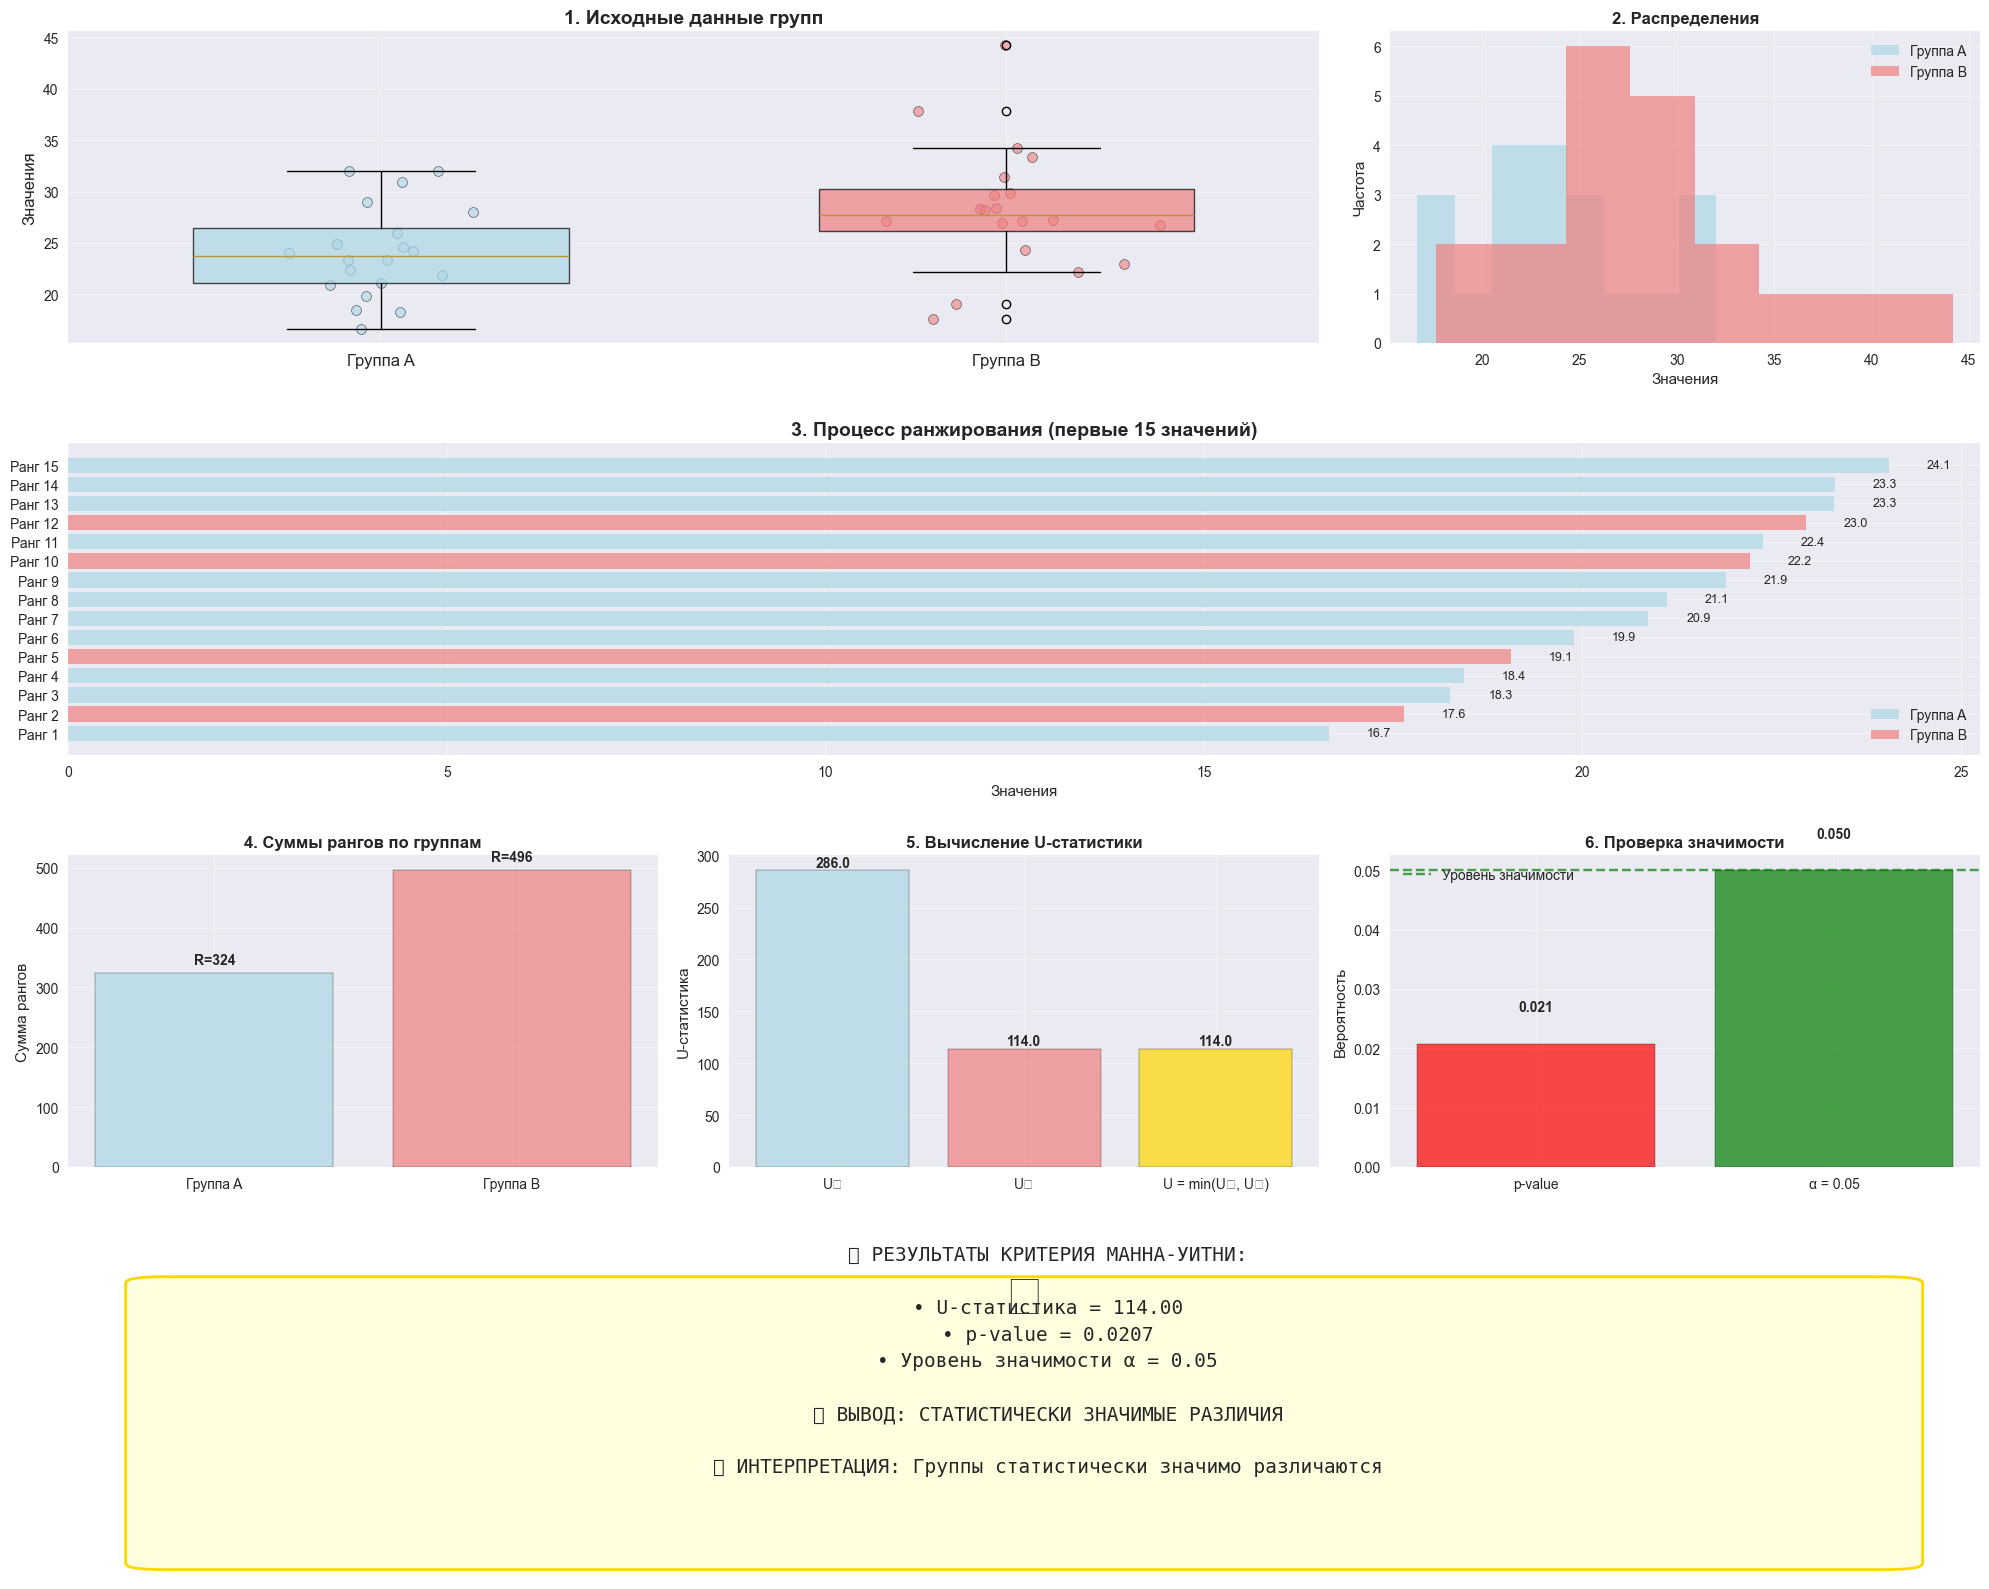


ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:
Размеры групп: Группа A = 20, Группа B = 20
Медианы: Группа A = 23.70, Группа B = 27.70
Суммы рангов: R₁ = 324, R₂ = 496
U-статистики: U₁ = 286.0, U₂ = 114.0
Минимальная U-статистика: 114.0
p-value: 0.0207

🎯 Интерактивные примеры с разными сценариями...


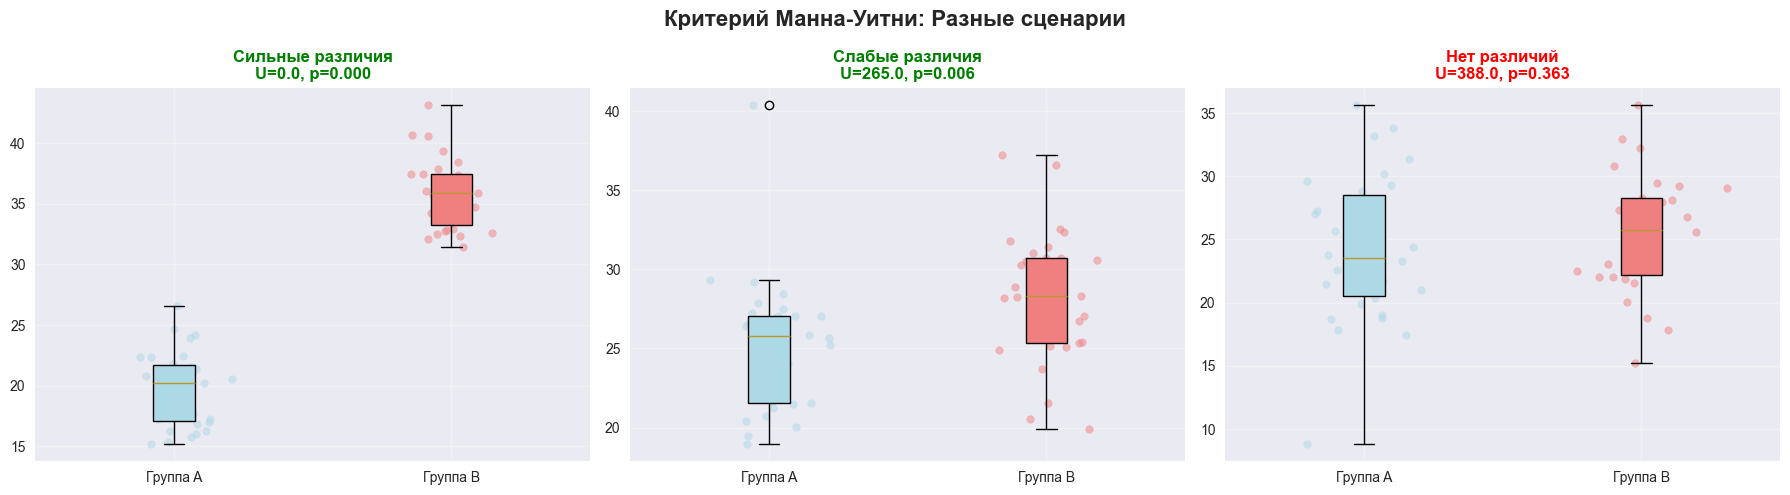

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from matplotlib.patches import FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def mann_whitney_visual_demo():
    """
    Графическая демонстрация критерия Манна-Уитни
    """
    # Создаем фигуру с несколькими subplots
    fig = plt.figure(figsize=(20, 16))
    
    # Генерируем пример данных
    np.random.seed(42)
    group_a = np.random.normal(25, 5, 20)
    group_b = np.random.normal(30, 6, 20)
    
    # Добавляем немного шума для реалистичности
    group_a += np.random.normal(0, 2, 20)
    group_b += np.random.normal(0, 2, 20)
    
    # 1. Визуализация исходных данных
    ax1 = plt.subplot2grid((4, 3), (0, 0), colspan=2)
    positions = [1, 2]
    
    # Boxplot
    bp = ax1.boxplot([group_a, group_b], positions=positions, 
                     patch_artist=True, widths=0.6)
    
    # Настройка внешнего вида boxplot
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Swarm plot точки
    for i, group in enumerate([group_a, group_b]):
        x = np.random.normal(positions[i], 0.1, len(group))
        ax1.scatter(x, group, alpha=0.6, s=50, color=colors[i], edgecolor='black', linewidth=0.5)
    
    ax1.set_xticks(positions)
    ax1.set_xticklabels(['Группа A', 'Группа B'], fontsize=12)
    ax1.set_ylabel('Значения', fontsize=12)
    ax1.set_title('1. Исходные данные групп', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # 2. Гистограммы распределений
    ax2 = plt.subplot2grid((4, 3), (0, 2))
    ax2.hist(group_a, alpha=0.7, color='lightblue', label='Группа A', bins=8)
    ax2.hist(group_b, alpha=0.7, color='lightcoral', label='Группа B', bins=8)
    ax2.set_xlabel('Значения')
    ax2.set_ylabel('Частота')
    ax2.set_title('2. Распределения', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Процесс ранжирования
    ax3 = plt.subplot2grid((4, 3), (1, 0), colspan=3)
    
    # Объединяем данные и создаем DataFrame для ранжирования
    combined_data = []
    for value in group_a:
        combined_data.append({'value': value, 'group': 'A', 'original_idx': len(combined_data)})
    for value in group_b:
        combined_data.append({'value': value, 'group': 'B', 'original_idx': len(combined_data)})
    
    df = pd.DataFrame(combined_data)
    df = df.sort_values('value')
    df['rank'] = range(1, len(df) + 1)
    
    # Визуализация ранжирования (первые 15 значений для наглядности)
    display_data = df.head(15)
    
    y_pos = np.arange(len(display_data))
    colors_rank = ['lightblue' if g == 'A' else 'lightcoral' for g in display_data['group']]
    
    bars = ax3.barh(y_pos, display_data['value'], color=colors_rank, alpha=0.7)
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels([f'Ранг {r}' for r in display_data['rank']])
    ax3.set_xlabel('Значения')
    ax3.set_title('3. Процесс ранжирования (первые 15 значений)', fontsize=14, fontweight='bold')
    
    # Добавляем подписи значений
    for i, (bar, value) in enumerate(zip(bars, display_data['value'])):
        ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{value:.1f}', ha='left', va='center', fontsize=9)
    
    # Легенда для групп
    ax3.legend(handles=[
        plt.Rectangle((0,0),1,1, fc='lightblue', alpha=0.7),
        plt.Rectangle((0,0),1,1, fc='lightcoral', alpha=0.7)
    ], labels=['Группа A', 'Группа B'], loc='lower right')
    
    ax3.grid(True, alpha=0.3)
    
    # 4. Суммы рангов
    ax4 = plt.subplot2grid((4, 3), (2, 0))
    
    # Вычисляем суммы рангов
    ranks_a = df[df['group'] == 'A']['rank'].sum()
    ranks_b = df[df['group'] == 'B']['rank'].sum()
    
    rank_sums = [ranks_a, ranks_b]
    groups = ['Группа A', 'Группа B']
    colors_rank_sum = ['lightblue', 'lightcoral']
    
    bars = ax4.bar(groups, rank_sums, color=colors_rank_sum, alpha=0.7, edgecolor='black')
    ax4.set_ylabel('Сумма рангов')
    ax4.set_title('4. Суммы рангов по группам', fontsize=12, fontweight='bold')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, rank_sums):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                f'R={int(value)}', ha='center', va='bottom', fontweight='bold')
    
    ax4.grid(True, alpha=0.3)
    
    # 5. Вычисление U-статистики
    ax5 = plt.subplot2grid((4, 3), (2, 1))
    
    # Вычисляем U-статистику
    n_a = len(group_a)
    n_b = len(group_b)
    
    U1 = n_a * n_b + (n_a * (n_a + 1)) / 2 - ranks_a
    U2 = n_a * n_b + (n_b * (n_b + 1)) / 2 - ranks_b
    U_stat = min(U1, U2)
    
    # Визуализация U-статистик
    u_values = [U1, U2, U_stat]
    u_labels = ['U₁', 'U₂', 'U = min(U₁, U₂)']
    u_colors = ['lightblue', 'lightcoral', 'gold']
    
    bars = ax5.bar(u_labels, u_values, color=u_colors, alpha=0.7, edgecolor='black')
    ax5.set_ylabel('U-статистика')
    ax5.set_title('5. Вычисление U-статистики', fontsize=12, fontweight='bold')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, u_values):
        ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    ax5.grid(True, alpha=0.3)
    
    # 6. Статистическая значимость
    ax6 = plt.subplot2grid((4, 3), (2, 2))
    
    # Выполняем тест Манна-Уитни
    U_stat_scipy, p_value = stats.mannwhitneyu(group_a, group_b, alternative='two-sided')
    
    # Визуализация p-value
    significance_level = 0.05
    x = [0, 1]
    y = [p_value, significance_level]
    labels = ['p-value', 'α = 0.05']
    colors_sig = ['red' if p_value < significance_level else 'blue', 'green']
    
    bars = ax6.bar(labels, y, color=colors_sig, alpha=0.7, edgecolor='black')
    ax6.set_ylabel('Вероятность')
    ax6.set_title('6. Проверка значимости', fontsize=12, fontweight='bold')
    ax6.axhline(y=significance_level, color='green', linestyle='--', alpha=0.7, label='Уровень значимости')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, y):
        ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    # 7. Финальный результат
    ax7 = plt.subplot2grid((4, 3), (3, 0), colspan=3)
    
    # Создаем красивый результат
    result_text = f"""
    📊 РЕЗУЛЬТАТЫ КРИТЕРИЯ МАННА-УИТНИ:
    
    • U-статистика = {U_stat:.2f}
    • p-value = {p_value:.4f}
    • Уровень значимости α = {significance_level}
    
    📈 ВЫВОД: {'СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ' if p_value < significance_level else 'НЕТ СТАТИСТИЧЕСКИ ЗНАЧИМЫХ РАЗЛИЧИЙ'}
    
    💡 ИНТЕРПРЕТАЦИЯ: {'Группы статистически значимо различаются' if p_value < significance_level else 'Группы не различаются статистически значимо'}
    """
    
    # Создаем fancy bounding box
    fancy_bbox = FancyBboxPatch((0.05, 0.05), 0.9, 0.9,
                              boxstyle="round,pad=0.02",
                              facecolor='lightyellow',
                              edgecolor='gold',
                              linewidth=2)
    ax7.add_patch(fancy_bbox)
    
    ax7.text(0.5, 0.7, result_text, ha='center', va='center', fontsize=14, 
            fontfamily='monospace', linespacing=1.5, transform=ax7.transAxes)
    
    # Добавляем эмодзи в зависимости от результата
    emoji = "✅" if p_value < significance_level else "❌"
    ax7.text(0.5, 0.9, emoji, ha='center', va='center', fontsize=40, 
            transform=ax7.transAxes)
    
    ax7.set_xlim(0, 1)
    ax7.set_ylim(0, 1)
    ax7.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Дополнительная информация в консоли
    print("\n" + "="*60)
    print("ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:")
    print("="*60)
    print(f"Размеры групп: Группа A = {len(group_a)}, Группа B = {len(group_b)}")
    print(f"Медианы: Группа A = {np.median(group_a):.2f}, Группа B = {np.median(group_b):.2f}")
    print(f"Суммы рангов: R₁ = {ranks_a:.0f}, R₂ = {ranks_b:.0f}")
    print(f"U-статистики: U₁ = {U1:.1f}, U₂ = {U2:.1f}")
    print(f"Минимальная U-статистика: {U_stat:.1f}")
    print(f"p-value: {p_value:.4f}")

def mann_whitney_interactive_example():
    """
    Интерактивный пример с разными сценариями
    """
    scenarios = {
        'Сильные различия': (np.random.normal(20, 3, 30), np.random.normal(35, 3, 30)),
        'Слабые различия': (np.random.normal(25, 4, 30), np.random.normal(28, 4, 30)),
        'Нет различий': (np.random.normal(25, 5, 30), np.random.normal(25, 5, 30))
    }
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, (scenario_name, (group_a, group_b)) in enumerate(scenarios.items()):
        ax = axes[idx]
        
        # Выполняем тест
        U_stat, p_value = stats.mannwhitneyu(group_a, group_b)
        
        # Визуализация
        positions = [1, 2]
        bp = ax.boxplot([group_a, group_b], positions=positions, patch_artist=True)
        
        colors = ['lightblue', 'lightcoral']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        # Добавляем точки
        for i, group in enumerate([group_a, group_b]):
            x = np.random.normal(positions[i], 0.1, len(group))
            ax.scatter(x, group, alpha=0.5, s=30, color=colors[i])
        
        ax.set_xticks(positions)
        ax.set_xticklabels(['Группа A', 'Группа B'])
        ax.set_title(f'{scenario_name}\nU={U_stat:.1f}, p={p_value:.3f}', 
                    fontweight='bold', color='green' if p_value < 0.05 else 'red')
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('Критерий Манна-Уитни: Разные сценарии', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Запуск демонстрации
if __name__ == "__main__":
    print("🚀 Запуск графической демонстрации критерия Манна-Уитни...")
    mann_whitney_visual_demo()
    
    print("\n" + "🎯 Интерактивные примеры с разными сценариями...")
    mann_whitney_interactive_example()